In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import UnitaryGate
import numpy as np

# Unitary matrices of functions

In [2]:
# Flips the input
U_f_balanced = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
])

# Maps all input to 1:
U_f_constant = np.array([ 
    [0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
])

# General function (majority output 0):
U_f_general0 = np.array([ 
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
])

# General function (majority output 1):
U_f_general1 = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
])

# Modelling and drawing the circuit

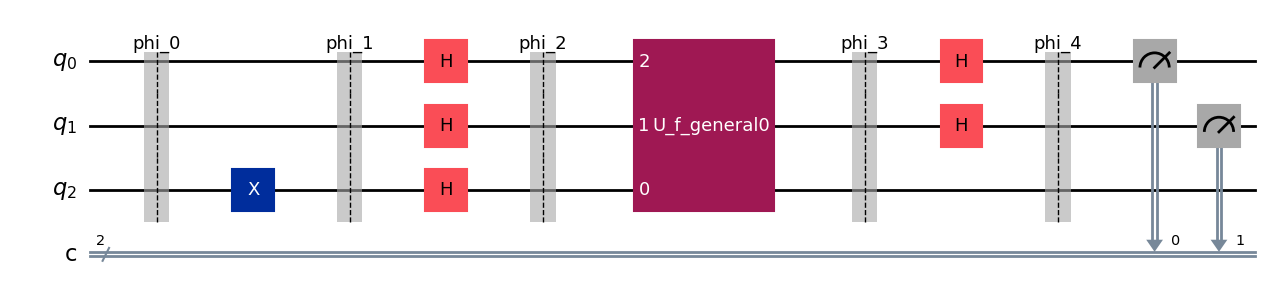

In [3]:
# n is the number of input qubits to the function
n = 2

de = QuantumCircuit(3, 2) # 3 qubits, 2 measure bits
de.save_statevector(label="phi_0")

# Step 1: Flip bottom bit to ket 1
de.x(2)
de.save_statevector(label="phi_1")

# Step 2.1: Put the top bit through H_n (n tensor products)
de.h(range(n+1)) # for bottom qubit as well
de.save_statevector(label="phi_2")

# Step 3: Apply the unitary matrix representing the function f
#U_f = UnitaryGate(U_f_constant, label="U_f_constant")
#U_f = UnitaryGate(U_f_balanced, label="U_f_balanced")
U_f = UnitaryGate(U_f_general0, label="U_f_general0")
#U_f = UnitaryGate(U_f_general1, label="U_f_general1")
de.append(U_f, [2, 1, 0])
de.save_statevector(label="phi_3")

# Step 4: Put the top n bits through a hadamard matrix
de.h(range(n))
de.save_statevector(label="phi_4")

# Step 5: Measure the top qubit
de.measure(0,0)
de.measure(1,1)

de.draw("mpl")

# Measurement

In [7]:
simulator = Aer.get_backend('aer_simulator')

# Transpile the circuit for the backend
compiled_circuit = transpile(de, simulator)

# Run the circuit
result = simulator.run(compiled_circuit, shots=100000).result()

# Get and print the counts
counts = result.get_counts()
print("Measurement results:", counts)


Measurement results: {'11': 24983, '00': 25069, '10': 25039, '01': 24909}


# Viewing intermediate states

In [8]:
# Retrieve states
state_0 = result.data(0)["phi_0"]
state_1 = result.data(0)["phi_1"]
state_2 = result.data(0)["phi_2"]
state_3 = result.data(0)["phi_3"]
state_4 = result.data(0)["phi_4"]
from qiskit.quantum_info import Statevector
print("Phi 0:\n", Statevector(state_0))
print("Phi 1:\n", Statevector(state_1))
print("Phi 2:\n", Statevector(state_2))
print("Phi 3:\n", Statevector(state_3))
print("Phi 4:\n", Statevector(state_4))

Phi 0:
 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Phi 1:
 Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Phi 2:
 Statevector([ 0.35355339-4.32978028e-17j,  0.35355339-4.32978028e-17j,
              0.35355339-4.32978028e-17j,  0.35355339-4.32978028e-17j,
             -0.35355339+4.32978028e-17j, -0.35355339+4.32978028e-17j,
             -0.35355339+4.32978028e-17j, -0.35355339+4.32978028e-17j],
            dims=(2, 2, 2))
Phi 3:
 Statevector([ 0.35355339-4.32978028e-17j,  0.35355339-4.32978028e-17j,
              0.35355339-4.32978028e-17j, -0.35355339+4.32978028e-17j,
             -0.35355339+4.32978028e-17j, -0.35355339+4.32978028e-17j,
             -0.35355339+4.32978028e-17j,  0.35355339-4.32978028e-17j],
            dims=(2, 2, 2))
Phi 4:
 Statevector([ 0.35355339-4.32978028e-17j,  0.35355339-8.65956056e-17j,
              0.35355339-